# Code and data for LaTeCH 2020 paper on a literariness questionnaire
Andreas van Cranenburgh and Corina Koolen

In [1]:
%matplotlib inline
import os
import pandas
import seaborn
import matplotlib.pyplot as plt
from sklearn import decomposition
seaborn.set_style('ticks')

In [2]:
books = pandas.read_csv('books.csv', index_col='Book')
books.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20 entries, Smit_Vloed to Giphart_ZevenJaarGoede
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Riddle rating bin  20 non-null     object 
 1   Author gender      20 non-null     object 
 2   ID                 20 non-null     int64  
 3   New ID             20 non-null     int64  
 4   Survey rating      20 non-null     float64
 5   SEM                20 non-null     float64
dtypes: float64(2), int64(2), object(2)
memory usage: 1.1+ KB


In [3]:
ratings = pandas.read_csv('ratings.csv', index_col=0)
ratings.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 48 entries, 0 to 47
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Smit_Vloed                48 non-null     int64  
 1   Mortier_Godenslaap        48 non-null     int64  
 2   Appel_VanTweeKanten       48 non-null     int64  
 3   Heijden_Tonio             48 non-null     int64  
 4   Tex_Wachtwoord            48 non-null     int64  
 5   Durlacher_Held            48 non-null     int64  
 6   Dijkzeul_GoudenBergen     48 non-null     int64  
 7   Dorrestein_Stiefmoeder    48 non-null     int64  
 8   Hollander_Troostkind      14 non-null     float64
 9   Voskuil_Buurman           14 non-null     float64
 10  Enquist_Verdovers         14 non-null     float64
 11  Vlugt_LaatsteOffer        14 non-null     float64
 12  Launspach_1953            14 non-null     float64
 13  Moor_SchilderEnMeisje     14 non-null     float64
 14  Grunberg_Man

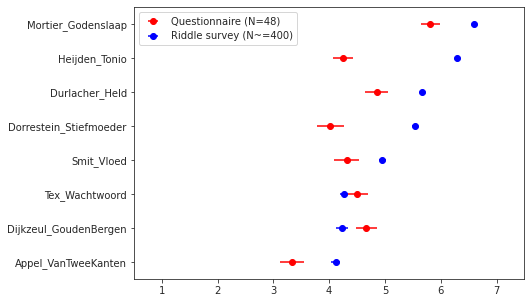

In [4]:
books = books.sort_values('Survey rating')
fig, ax = plt.subplots(1, 1, figsize=(7, 5));
x = books.index[(books['New ID'] <= 8)]
#ax.set_title('Questionnaire ratings (N=48), sorted by Riddle survey ');
ax.set_ylabel('');
ax.set_xlim(0.5, 7.5); ax.set_xticks(range(1, 8));
ax.set_ylim(-0.5, 7.5); ax.set_yticks(range(8)); ax.set_yticklabels(x);
ax.errorbar(ratings.loc[:, x].mean(), range(8), fmt='ro', xerr=ratings.loc[:, x].sem(), label='Questionnaire (N=48)')
ax.errorbar(books.loc[x, 'Survey rating'], range(8), fmt='bo', xerr=books.loc[x, 'SEM'], label='Riddle survey (N~=400)')
ax.legend();

In [5]:
books.index[(books['New ID'] <= 8)]

Index(['Appel_VanTweeKanten', 'Dijkzeul_GoudenBergen', 'Tex_Wachtwoord',
       'Smit_Vloed', 'Dorrestein_Stiefmoeder', 'Durlacher_Held',
       'Heijden_Tonio', 'Mortier_Godenslaap'],
      dtype='object', name='Book')

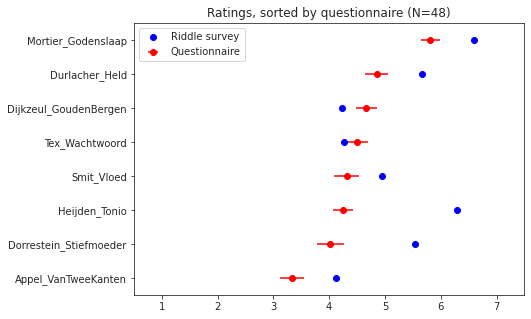

In [6]:
books = books.loc[ratings.mean().sort_values().index, :]
fig, ax = plt.subplots(1, 1, figsize=(7, 5));
x = books.index[(books['New ID'] <= 8)]
ax.set_title('Ratings, sorted by questionnaire (N=48)');
ax.set_ylabel('');
ax.set_xlim(0.5, 7.5); ax.set_xticks(range(1, 8));
ax.set_ylim(-0.5, 7.5); ax.set_yticks(range(8)); ax.set_yticklabels(x);
ax.plot(books.loc[x, 'Survey rating'], range(8), 'bo', label='Riddle survey')
ax.errorbar(ratings.loc[:, x].mean(), range(8), fmt='ro', xerr=ratings.loc[:, x].sem(), label='Questionnaire')
ax.legend();

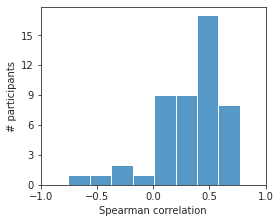

In [7]:
# compute correlation of questionnaire-ratings with survey ratings
correlations = ratings.iloc[:, :8].apply(lambda x: x.corr(books[books['New ID'] <= 8]['Survey rating'], 'spearman'), axis=1)
fig, ax = plt.subplots(figsize=(4, 3.2))
seaborn.histplot(correlations, ax=ax);
# seaborn.distplot(correlations, kde=False, hist_kws={'linewidth': 2, 'alpha': 0.5}, ax=ax)
ax.set_xlabel('Spearman correlation')
ax.set_ylabel('# participants')
ax.set_yticks(range(0, 18, 3))
ax.set_xlim(-1, 1); #ax.set_xticks([-1, -.75, -.5, -.25, 0, .25, .5, .75, 1])
ax.figure.tight_layout()
ax.figure.savefig('hist.png', dpi=150)
ax.figure.savefig('hist.pdf')

In [8]:
correlations.describe()

count    48.000000
mean      0.316105
std       0.310216
min      -0.755929
25%       0.159780
50%       0.413473
75%       0.547260
max       0.769800
dtype: float64

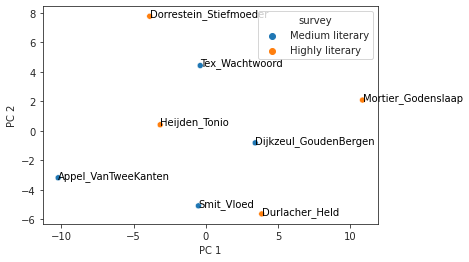

In [9]:
# PCA of the 8 novels based on ratings
model = decomposition.PCA(n_components=2, random_state=0)
X = pandas.DataFrame(model.fit_transform(ratings.iloc[:, :8].T), index=ratings.columns[:8], columns=['PC 1', 'PC 2'])
X['survey'] = books.loc[X.index, 'Riddle rating bin']
ax = seaborn.scatterplot(data=X, x='PC 1', y='PC 2', hue='survey')
for line in range(0, X.shape[0]):
     ax.text(X.iloc[line, 0], X.iloc[line, 1], 
         X.index[line], horizontalalignment='left', 
         size='medium', color='black')

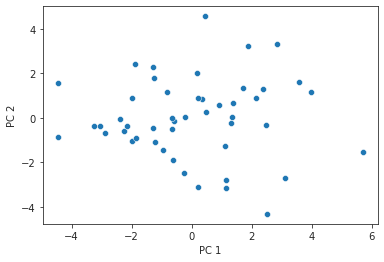

In [10]:
# PCA of the 48 participants based on ratings
model = decomposition.PCA(n_components=2, random_state=0)
X = pandas.DataFrame(model.fit_transform(ratings.iloc[:, :8]), columns=['PC 1', 'PC 2'])
ax = seaborn.scatterplot(data=X, x='PC 1', y='PC 2')

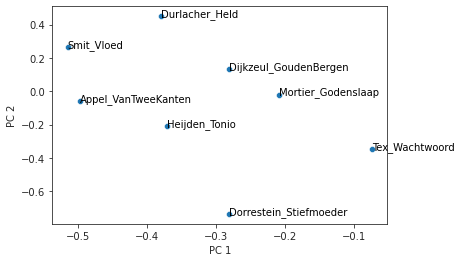

In [11]:
loadings = pandas.DataFrame(model.components_.T, index=ratings.columns[:8], columns=['PC 1', 'PC 2'])
ax = seaborn.scatterplot(data=loadings, x='PC 1', y='PC 2')
for line in range(0, loadings.shape[0]):
     ax.text(loadings.iloc[line, 0], loadings.iloc[line, 1], 
         loadings.index[line], horizontalalignment='left', 
         size='medium', color='black')

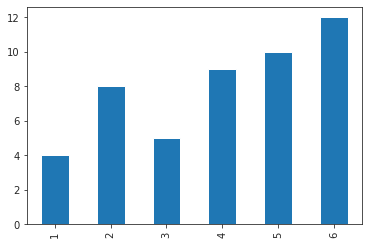

In [12]:
ratings['Dorrestein_Stiefmoeder'].value_counts(sort=False).plot(kind='bar');

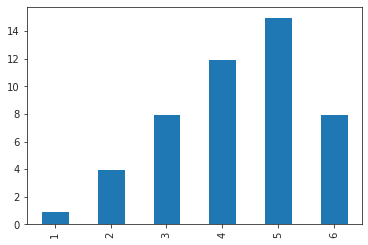

In [13]:
ratings['Heijden_Tonio'].value_counts(sort=False).plot(kind='bar');

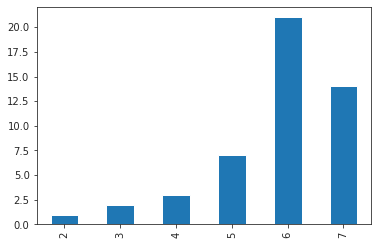

In [14]:
ratings['Mortier_Godenslaap'].value_counts(sort=False).plot(kind='bar');

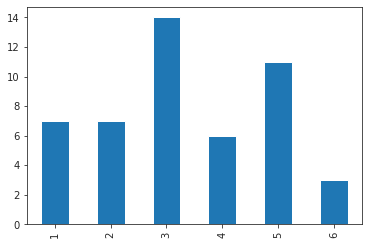

In [15]:
ratings['Appel_VanTweeKanten'].value_counts(sort=False).plot(kind='bar');

# Comparison with predictive model

In [16]:
#pred_eacl2017 = pandas.read_csv('/home/andreas/code/literariness/Riddle/ensemble.csv', index_col=0)
#pred_eacl2017 = pred_eacl2017.loc[['Appel_VanTweeKanten', 'Dorrestein_Stiefmoeder', 'Durlacher_Held',
#       'Heijden_Tonio', 'Mortier_Godenslaap', 'Smit_Vloed', 'Tex_Wachtwoord'], :]
#pred_eacl2017.loc['Dijkzeul_GoudenBergen', :] = [float('nan')] * 24
#pred_eacl2017.to_csv('eacl2017pred.csv')
pred_eacl2017 = pandas.read_csv('eacl2017pred.csv', index_col=0)
pred_eacl2017

,fold,target,words per sentence,+ % direct speech sentences,+ top3000vocab,+ bzip2_ratio,+ cliches,+ stylebigrams,+ prod,+ topics,...,+ Translated,+ Author gender,+ % adjectives,+ % adverbs,+ % nouns,+ % verbs,+ % modifying PPs,+ % modifying RELs,+ avgdeplen,+ avgdlevel
Appel_VanTweeKanten,1.0,4.117216,4.133771,4.238551,4.049557,4.072493,3.655372,3.437373,3.564570,3.738693,...,3.675393,3.930282,3.924073,3.931986,3.930068,3.932005,3.935319,3.934226,3.959849,3.957291
Dorrestein_Stiefmoeder,4.0,5.531317,4.326151,4.561215,4.626471,4.773597,4.437968,4.426606,4.792451,5.136006,...,5.417102,5.280988,5.248433,5.249833,5.247273,5.245615,5.244409,5.256930,5.260476,5.262112
Durlacher_Held,4.0,5.664683,4.135319,4.436322,4.411472,4.507473,4.789324,5.218586,5.201159,5.044199,...,5.437504,5.234987,5.157170,5.154351,5.144642,5.141858,5.180469,5.154492,5.155999,5.179485
Heijden_Tonio,2.0,6.285156,4.532974,4.597377,4.605774,4.824722,4.938900,5.126663,5.166859,5.583029,...,5.734696,5.836805,5.809253,5.840076,5.839092,5.838904,5.850651,5.849236,5.843980,5.842127
Mortier_Godenslaap,4.0,6.602469,5.894855,5.717244,5.777048,5.817366,5.679489,5.221583,5.738085,6.542801,...,6.490365,6.744808,6.797346,6.805567,6.808365,6.807248,6.854868,6.857199,6.870710,6.888780
Smit_Vloed,4.0,4.956427,4.632918,5.203415,5.184243,5.238676,5.479252,5.680693,5.709670,5.497818,...,5.630663,5.561231,5.574437,5.585623,5.585342,5.585066,5.610857,5.597598,5.587959,5.564708
Tex_Wachtwoord,5.0,4.272727,4.033466,4.287853,4.025159,4.036820,3.577667,4.631741,4.695762,4.222625,...,4.145219,4.230634,4.238554,4.228583,4.220978,4.217518,4.214659,4.205290,4.184560,4.179515
Dijkzeul_GoudenBergen,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [17]:
predfrag = pandas.Series(pred_eacl2017.loc[['Appel_VanTweeKanten', 'Dorrestein_Stiefmoeder', 'Durlacher_Held',
       'Heijden_Tonio', 'Mortier_Godenslaap', 'Smit_Vloed', 'Tex_Wachtwoord'], '+ fragments'])
predfrag.at['Dijkzeul_GoudenBergen'] = float('nan')
predfrag

Appel_VanTweeKanten       3.707471
Dorrestein_Stiefmoeder    5.283645
Durlacher_Held            5.167161
Heijden_Tonio             5.641244
Mortier_Godenslaap        6.546035
Smit_Vloed                5.515129
Tex_Wachtwoord            4.238192
Dijkzeul_GoudenBergen          NaN
Name: + fragments, dtype: float64

In [18]:
# manually determined matching fragments
matchingfragments = {
    'Smit_Vloed': '71-2',  # 257 words
    'Mortier_Godenslaap': '58-4', # '84-2', # 248 words, fragment cut off at 159 words
    'Appel_VanTweeKanten': '108-1',  #
    'Heijden_Tonio': '350-5',  #
    'Tex_Wachtwoord': '49-1',  # 28-6
    'Durlacher_Held': '35-4',  #
    'Dijkzeul_GoudenBergen': '95-3',  #
    'Dorrestein_Stiefmoeder': '115-2',  #
}

In [19]:
# pred = pandas.read_csv('/home/andreas/research/deeplit.new/d2v_lda_pred.csv', index_col=0)
# pred.loc[[a + ' ' + b for a, b in matchingfragments.items()], :].to_csv('lrev2019pred.csv')
pred = pandas.read_csv('lrev2019pred.csv', index_col=0)
pred

,prediction
Smit_Vloed 71-2,5.021109
Mortier_Godenslaap 58-4,6.374915
Appel_VanTweeKanten 108-1,3.698577
Heijden_Tonio 350-5,5.352931
Tex_Wachtwoord 49-1,4.227864
Durlacher_Held 35-4,4.492983
Dijkzeul_GoudenBergen 95-3,5.231453
Dorrestein_Stiefmoeder 115-2,5.420179


In [20]:
mpred = pandas.Series({a: pred.at[a + ' ' + b, 'prediction'] for a, b in matchingfragments.items()})
mpred

Smit_Vloed                5.021109
Mortier_Godenslaap        6.374915
Appel_VanTweeKanten       3.698577
Heijden_Tonio             5.352931
Tex_Wachtwoord            4.227864
Durlacher_Held            4.492983
Dijkzeul_GoudenBergen     5.231453
Dorrestein_Stiefmoeder    5.420179
dtype: float64

In [21]:
x = books.index[(books['New ID'] <= 8)]
x

Index(['Appel_VanTweeKanten', 'Dorrestein_Stiefmoeder', 'Heijden_Tonio',
       'Smit_Vloed', 'Tex_Wachtwoord', 'Dijkzeul_GoudenBergen',
       'Durlacher_Held', 'Mortier_Godenslaap'],
      dtype='object')

In [22]:
mpred.loc[x]

Appel_VanTweeKanten       3.698577
Dorrestein_Stiefmoeder    5.420179
Heijden_Tonio             5.352931
Smit_Vloed                5.021109
Tex_Wachtwoord            4.227864
Dijkzeul_GoudenBergen     5.231453
Durlacher_Held            4.492983
Mortier_Godenslaap        6.374915
dtype: float64

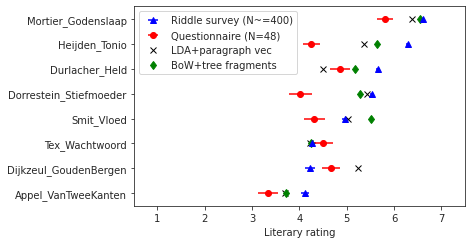

In [23]:
books = books.sort_values('Survey rating')
fig, ax = plt.subplots(1, 1, figsize=(6.66, 3.5));
x = books.index[(books['New ID'] <= 8)]
ax.set_ylabel(''); ax.set_xlabel('Literary rating'); 
ax.set_xlim(0.5, 7.5); ax.set_xticks(range(1, 8));
ax.set_ylim(-0.5, 7.5); ax.set_yticks(range(8)); ax.set_yticklabels(x);
# NB: index on x otherwise data is not aligned!
ax.errorbar(books.loc[x, 'Survey rating'], range(8), fmt='b^', xerr=books.loc[x, 'SEM'], label='Riddle survey (N~=400)')
ax.errorbar(ratings.loc[:, x].mean(), range(8), fmt='ro', xerr=ratings.loc[:, x].sem(), label='Questionnaire (N=48)')
ax.plot(mpred.loc[x], range(8), 'kx', label='LDA+paragraph vec')
ax.plot(predfrag.loc[x], range(8), 'gd', label='BoW+tree fragments')
handles, labels = ax.get_legend_handles_labels()
labels, handles = zip(*sorted(zip(labels, handles), key=lambda t: t[0], reverse=True))
ax.legend(handles, labels)
fig.tight_layout()
fig.savefig('ranking1.png', dpi=150)
fig.savefig('ranking1.pdf')

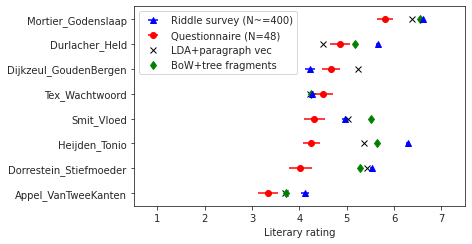

In [24]:
books = books.loc[ratings.mean().sort_values().index, :]
fig, ax = plt.subplots(1, 1, figsize=(6.66, 3.5));
x = books.index[(books['New ID'] <= 8)]
ax.set_ylabel(''); ax.set_xlabel('Literary rating'); 
ax.set_xlim(0.5, 7.5); ax.set_xticks(range(1, 8));
ax.set_ylim(-0.5, 7.5); ax.set_yticks(range(8)); ax.set_yticklabels(x);
# NB: index on x otherwise data is not aligned!
ax.errorbar(books.loc[x, 'Survey rating'], range(8), fmt='b^', xerr=books.loc[x, 'SEM'], label='Riddle survey (N~=400)')
ax.errorbar(ratings.loc[:, x].mean(), range(8), fmt='ro', xerr=ratings.loc[:, x].sem(), label='Questionnaire (N=48)')
ax.plot(mpred.loc[x], range(8), 'kx', label='LDA+paragraph vec')
ax.plot(predfrag.loc[x], range(8), 'gd', label='BoW+tree fragments')
handles, labels = ax.get_legend_handles_labels()
labels, handles = zip(*sorted(zip(labels, handles), key=lambda t: t[0], reverse=True))

ax.legend(handles, labels)
fig.tight_layout()
fig.savefig('ranking2.png', dpi=150)
fig.savefig('ranking2.pdf')

In [25]:
newdf = pandas.DataFrame({'Questionnaire': ratings.loc[:, x].mean(),
                          'SD': ratings.loc[:, x].std(),
                          'Survey': books.loc[x, 'Survey rating'],
                          'Pred. LDA+PV': mpred,
                          'Pred. bigram+frag': predfrag}
                        ).sort_values('Questionnaire', ascending=False)
newdf['$\Delta$ Questionnaire'] = newdf.Questionnaire - newdf.Survey
newdf['$\Delta$ Prediction'] = newdf['Pred. LDA+PV'] - newdf.Survey
newdf.round(1)

,Questionnaire,SD,Survey,Pred. LDA+PV,Pred. bigram+frag,$\Delta$ Questionnaire,$\Delta$ Prediction
Mortier_Godenslaap,5.8,1.2,6.6,6.4,6.5,-0.8,-0.2
Durlacher_Held,4.9,1.4,5.7,4.5,5.2,-0.8,-1.2
Dijkzeul_GoudenBergen,4.7,1.3,4.2,5.2,NaN,0.4,1.0
Tex_Wachtwoord,4.5,1.4,4.3,4.2,4.2,0.2,-0.0
Smit_Vloed,4.3,1.6,5.0,5.0,5.5,-0.6,0.1
Heijden_Tonio,4.2,1.3,6.3,5.4,5.6,-2.0,-0.9
Dorrestein_Stiefmoeder,4.0,1.7,5.5,5.4,5.3,-1.5,-0.1
Appel_VanTweeKanten,3.3,1.5,4.1,3.7,3.7,-0.8,-0.4


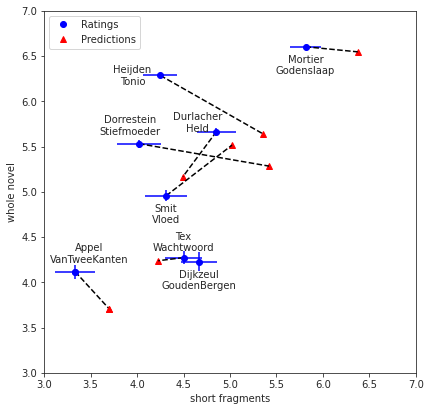

In [26]:
xydelta = {
    'Smit_Vloed': (0, -0.3),
    'Mortier_Godenslaap': (0, -0.3),
    'Appel_VanTweeKanten': (0.15, 0.1),
    'Heijden_Tonio': (-0.3, -0.1),
    'Tex_Wachtwoord': (0, 0.075),
    'Durlacher_Held': (-0.2, 0.0),
    'Dijkzeul_GoudenBergen': (0, -0.3),
    'Dorrestein_Stiefmoeder': (-0.1, 0.1),
}
fig, ax = plt.subplots(1, 1, figsize=(6.66, 6.66));
for a, row in newdf.iterrows():
    ax.errorbar(row['Questionnaire'], row['Survey'], fmt='bo',
            xerr=ratings.loc[:, a].sem(), yerr=books.at[a, 'SEM']
           )
    ax.plot(row['Pred. LDA+PV'], row['Pred. bigram+frag'], 'r^')
    ax.plot([row['Questionnaire'], row['Pred. LDA+PV']],
            [row['Survey'], row['Pred. bigram+frag']], 'k--')
    x, y = xydelta[a]
    ax.text(row['Questionnaire'] + x, row['Survey'] + y, a.replace('_', '\n'),
           horizontalalignment='center')
ax.plot(row['Questionnaire'], row['Survey'], 'bo', label='Ratings')
ax.plot(row['Pred. LDA+PV'], row['Pred. bigram+frag'], 'r^', label='Predictions')
#newdf.plot.scatter('Questionnaire', 'Survey', c='b', ax=ax, label='Ratings');
#newdf.plot.scatter('Pred. LDA+PV', 'Pred. bigram+frag', c='r', ax=ax, label='Predictions');
ax.set_xlabel('short fragments'); ax.set_ylabel('whole novel');
ax.set_xlim(3, 7); ax.set_ylim(3, 7);
ax.legend();
fig.savefig('scatterplot.pdf')